# 2 Exploratory Data Analysis<a id='2_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.2_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
    * [2.4.1 Ski data](#2.4.1_Ski_data)
    * [2.4.2 State-wide summary data](#2.4.2_State-wide_summary_data)
  * [2.5 Explore The Data](#2.5_Explore_The_Data)
    * [2.5.1 Top States By Order Of Each Of The Summary Statistics](#2.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [2.5.1.1 Total state area](#2.5.1.1_Total_state_area)
      * [2.5.1.2 Total state population](#2.5.1.2_Total_state_population)
      * [2.5.1.3 Resorts per state](#2.5.1.2_Resorts_per_state)
      * [2.5.1.4 Total skiable area](#2.5.1.4_Total_skiable_area)
      * [2.5.1.5 Total night skiing area](#2.5.1.5_Total_night_skiing_area)
      * [2.5.1.6 Total days open](#2.5.1.6_Total_days_open)
    * [2.5.2 Resort density](#2.5.2_Resort_density)
      * [2.5.2.1 Top states by resort density](#2.5.2.1_Top_states_by_resort_density)
    * [2.5.3 Visualizing High Dimensional Data](#2.5.2_Visualizing_High_Dimensional_Data)
      * [2.5.2.1 Scale the data](#2.5.2.1_Scale_the_data)
        * [2.5.2.1.1 Verifying the scaling](#2.5.2.1.1_Verifying_the_scaling)
      * [2.5.3.2 Calculate the PCA transformation](#2.5.2.2_Calculate_the_PCA_transformation)
      * [2.5.3.2 Average ticket price by state](#2.5.2.2_Average_ticket_price_by_state)
      * [2.5.3.4 Adding average ticket price to scatter plot](#2.5.2.4_Adding_average_ticket_price_to_scatter_plot)
    * [2.5.4 Conclusion On How To Handle State Label](#2.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [2.5.5 Ski Resort Numeric Data](#2.5.5_Ski_Resort_Numeric_Data)
      * [2.5.5.1 Feature engineering](#2.5.5.1_Feature_engineering)
      * [2.5.5.2 Feature correlation heatmap](#2.5.5.2_Feature_correlation_heatmap)
      * [2.5.5.3 Scatterplots of numeric features against ticket price](#2.5.5.2_Scatterplots_of_numeric_features_against_ticket_price)
  * [2.6 Summary](#2.6_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

Our problem for Capital Fortune is to find the best estimates for their houses which are set to finish building by 2024, and find which house type yield the highest return on investment. Our target feature is price in our final dataframe, which will be use to predict house prices for Capital Fortune. We used zillow nyc housing data set with over 75k observations and 1507 variables but we digested it down to over 59k observations and 27 variables. 

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.ticker as tick

from IPython import display
from ipywidgets import interact, widgets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

### 2.4.1 Ski data<a id='2.4.1_Ski_data'></a>

In [2]:
nyc_df = pd.read_csv('../data/final_nyc.csv')

In [3]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59350 entries, 0 to 59349
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    59350 non-null  object 
 1   Borough                 59350 non-null  object 
 2   Neighborhood            59350 non-null  object 
 3   address/streetAddress   59350 non-null  object 
 4   ZipCode                 59343 non-null  float64
 5   latitude                59350 non-null  float64
 6   longitude               59350 non-null  float64
 7   price                   59350 non-null  float64
 8   propertyTaxRate         59338 non-null  float64
 9   Annual_Tax              50688 non-null  float64
 10  Tax_Assessed_Value      48891 non-null  float64
 11  Lot_Size(SqFT)          50072 non-null  float64
 12  $_Per_SqFT              50072 non-null  float64
 13  LivingArea_Space(SqFT)  52079 non-null  float64
 14  HomeType                59135 non-null

In [4]:
nyc_df.head()

,City,Borough,Neighborhood,address/streetAddress,ZipCode,latitude,longitude,price,propertyTaxRate,Annual_Tax,...,Total_Bathrooms,Full_Bathrooms,Half_Bathrooms,ParkingType,Basement,Cooling_Available,Fireplace_Available,Heating_Available,Spa_Available,Story_Building
0,New York,Manhattan,Marble Hill,60 Terrace View Ave,10463.0,40.877743,-73.910866,799999.0,0.88,5096.0,...,2.0,1.0,1.0,Driveway,True,True,False,True,False,1.0
1,Bronx,Bronx,Bronx County,625 W 246th St,10471.0,40.892689,-73.910667,3995000.0,0.95,13941.0,...,8.0,7.0,1.0,"Garage, Garage - Attached",False,True,True,False,False,1.0
2,Bronx,Bronx,Bronx County,716 W 231st St,10463.0,40.883419,-73.918106,1495000.0,0.95,12253.0,...,3.0,3.0,0.0,"Garage, Garage - Attached",False,False,False,False,False,2.0
3,Bronx,Bronx,Bronx County,750 W 232nd St,10463.0,40.885033,-73.917793,3450000.0,0.95,19472.0,...,6.0,6.0,0.0,"Garage, Garage - Attached",False,True,True,False,False,2.0
4,Bronx,Bronx,Bronx County,632 W 230th St,10463.0,40.881702,-73.914185,1790000.0,0.95,NaN,...,6.0,5.0,1.0,0 spaces,False,True,False,False,False,1.0


In [5]:
#This is a function by Dan Friedman to change the labels of large numbers 
#Here is a link
#https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

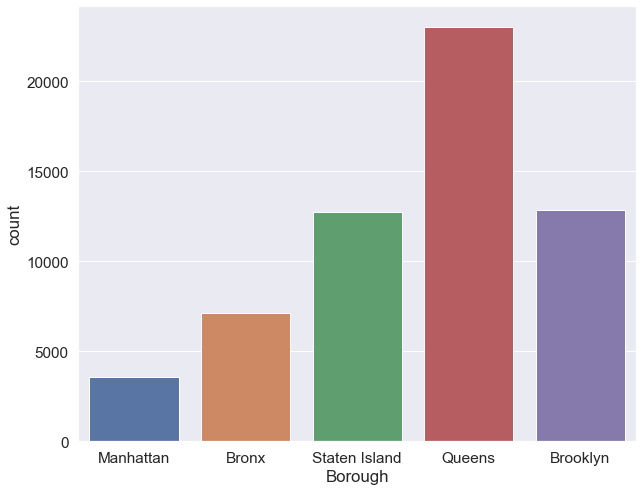

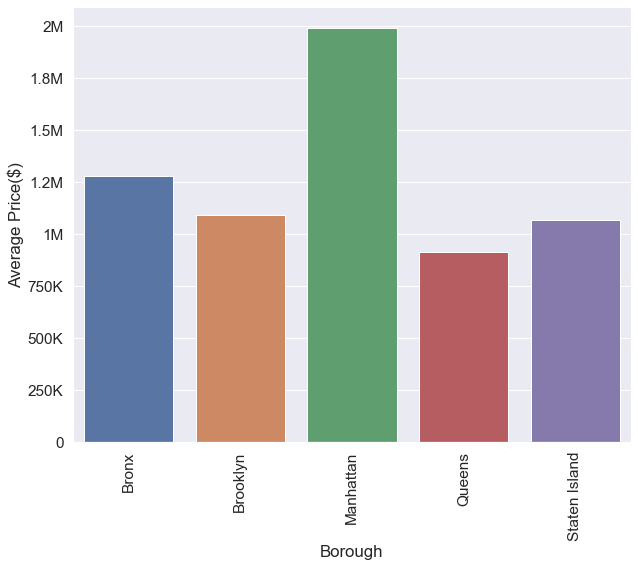

In [7]:
#Lets bar plot the number of houses in each borough
plt.subplots(figsize=(10, 8))
sns.countplot(x='Borough', data=nyc_df)
#Looks like Queens has significantly more houses 
#Lets bar plot the average price of houses by thier boroughs
house_prices_borough = nyc_df[['Borough','price']].groupby('Borough', as_index=False).mean().round()
#Manhattan has the most expensive
plt.subplots(figsize=(10, 8))
sns.barplot(x='Borough', y='price', data=house_prices_borough)
plt.xticks(rotation='vertical')
plt.ylabel('Average Price($)')
plt.xlabel('Borough')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

In [8]:
nyc_df.dtypes

City                       object
Borough                    object
Neighborhood               object
address/streetAddress      object
ZipCode                   float64
latitude                  float64
longitude                 float64
price                     float64
propertyTaxRate           float64
Annual_Tax                float64
Tax_Assessed_Value        float64
Lot_Size(SqFT)            float64
$_Per_SqFT                float64
LivingArea_Space(SqFT)    float64
HomeType                   object
YearBuilt                 float64
Bedrooms                  float64
Total_Bathrooms           float64
Full_Bathrooms            float64
Half_Bathrooms            float64
ParkingType                object
Basement                     bool
Cooling_Available            bool
Fireplace_Available          bool
Heating_Available            bool
Spa_Available                bool
Story_Building            float64
dtype: object

In [44]:
#Lets look at our variable distribution and how it affects the price
data = nyc_df[['price', 'Lot_Size(SqFT)', 'LivingArea_Space(SqFT)', 'Bedrooms', 'Total_Bathrooms']]
data = data.dropna()


,price,Annual_Tax,Lot_Size(SqFT),LivingArea_Space(SqFT),Bedrooms,Total_Bathrooms
7665,749999.0,0.0,1.0,724.0,1.0,1.0
7975,560000.0,0.0,550.0,600.0,1.0,1.0
8192,570000.0,0.0,600.0,600.0,4.0,1.0
21300,525000.0,0.0,21780.0,600.0,1.0,1.0
21347,770000.0,0.0,4000.0,635.0,1.0,1.0
21465,1700000.0,0.0,1250.0,1250.0,3.0,1.0
34064,410000.0,0.0,1000.0,1000.0,2.0,1.0
35341,330000.0,0.0,300.0,290.0,3.0,1.0
35634,1950000.0,0.0,1725.0,1845.0,2.0,1.0
39492,499000.0,0.0,949.0,950.0,2.0,1.0


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='Lot_Size(SqFT)', ylabel='price'>,
        <AxesSubplot:xlabel='LivingArea_Space(SqFT)', ylabel='price'>,
        <AxesSubplot:xlabel='Bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='Total_Bathrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='Lot_Size(SqFT)'>,
        <AxesSubplot:xlabel='Lot_Size(SqFT)', ylabel='Lot_Size(SqFT)'>,
        <AxesSubplot:xlabel='LivingArea_Space(SqFT)', ylabel='Lot_Size(SqFT)'>,
        <AxesSubplot:xlabel='Bedrooms', ylabel='Lot_Size(SqFT)'>,
        <AxesSubplot:xlabel='Total_Bathrooms', ylabel='Lot_Size(SqFT)'>],
       [<AxesSubplot:xlabel='price', ylabel='LivingArea_Space(SqFT)'>,
        <AxesSubplot:xlabel='Lot_Size(SqFT)', ylabel='LivingArea_Space(SqFT)'>,
        <AxesSubplot:xlabel='LivingArea_Space(SqFT)', ylabel='LivingArea_Space(SqFT)'>,
        <AxesSubplot:xlabel='Bedrooms', ylabel='LivingArea_Space(SqFT)'>,
        <AxesSubplot:x

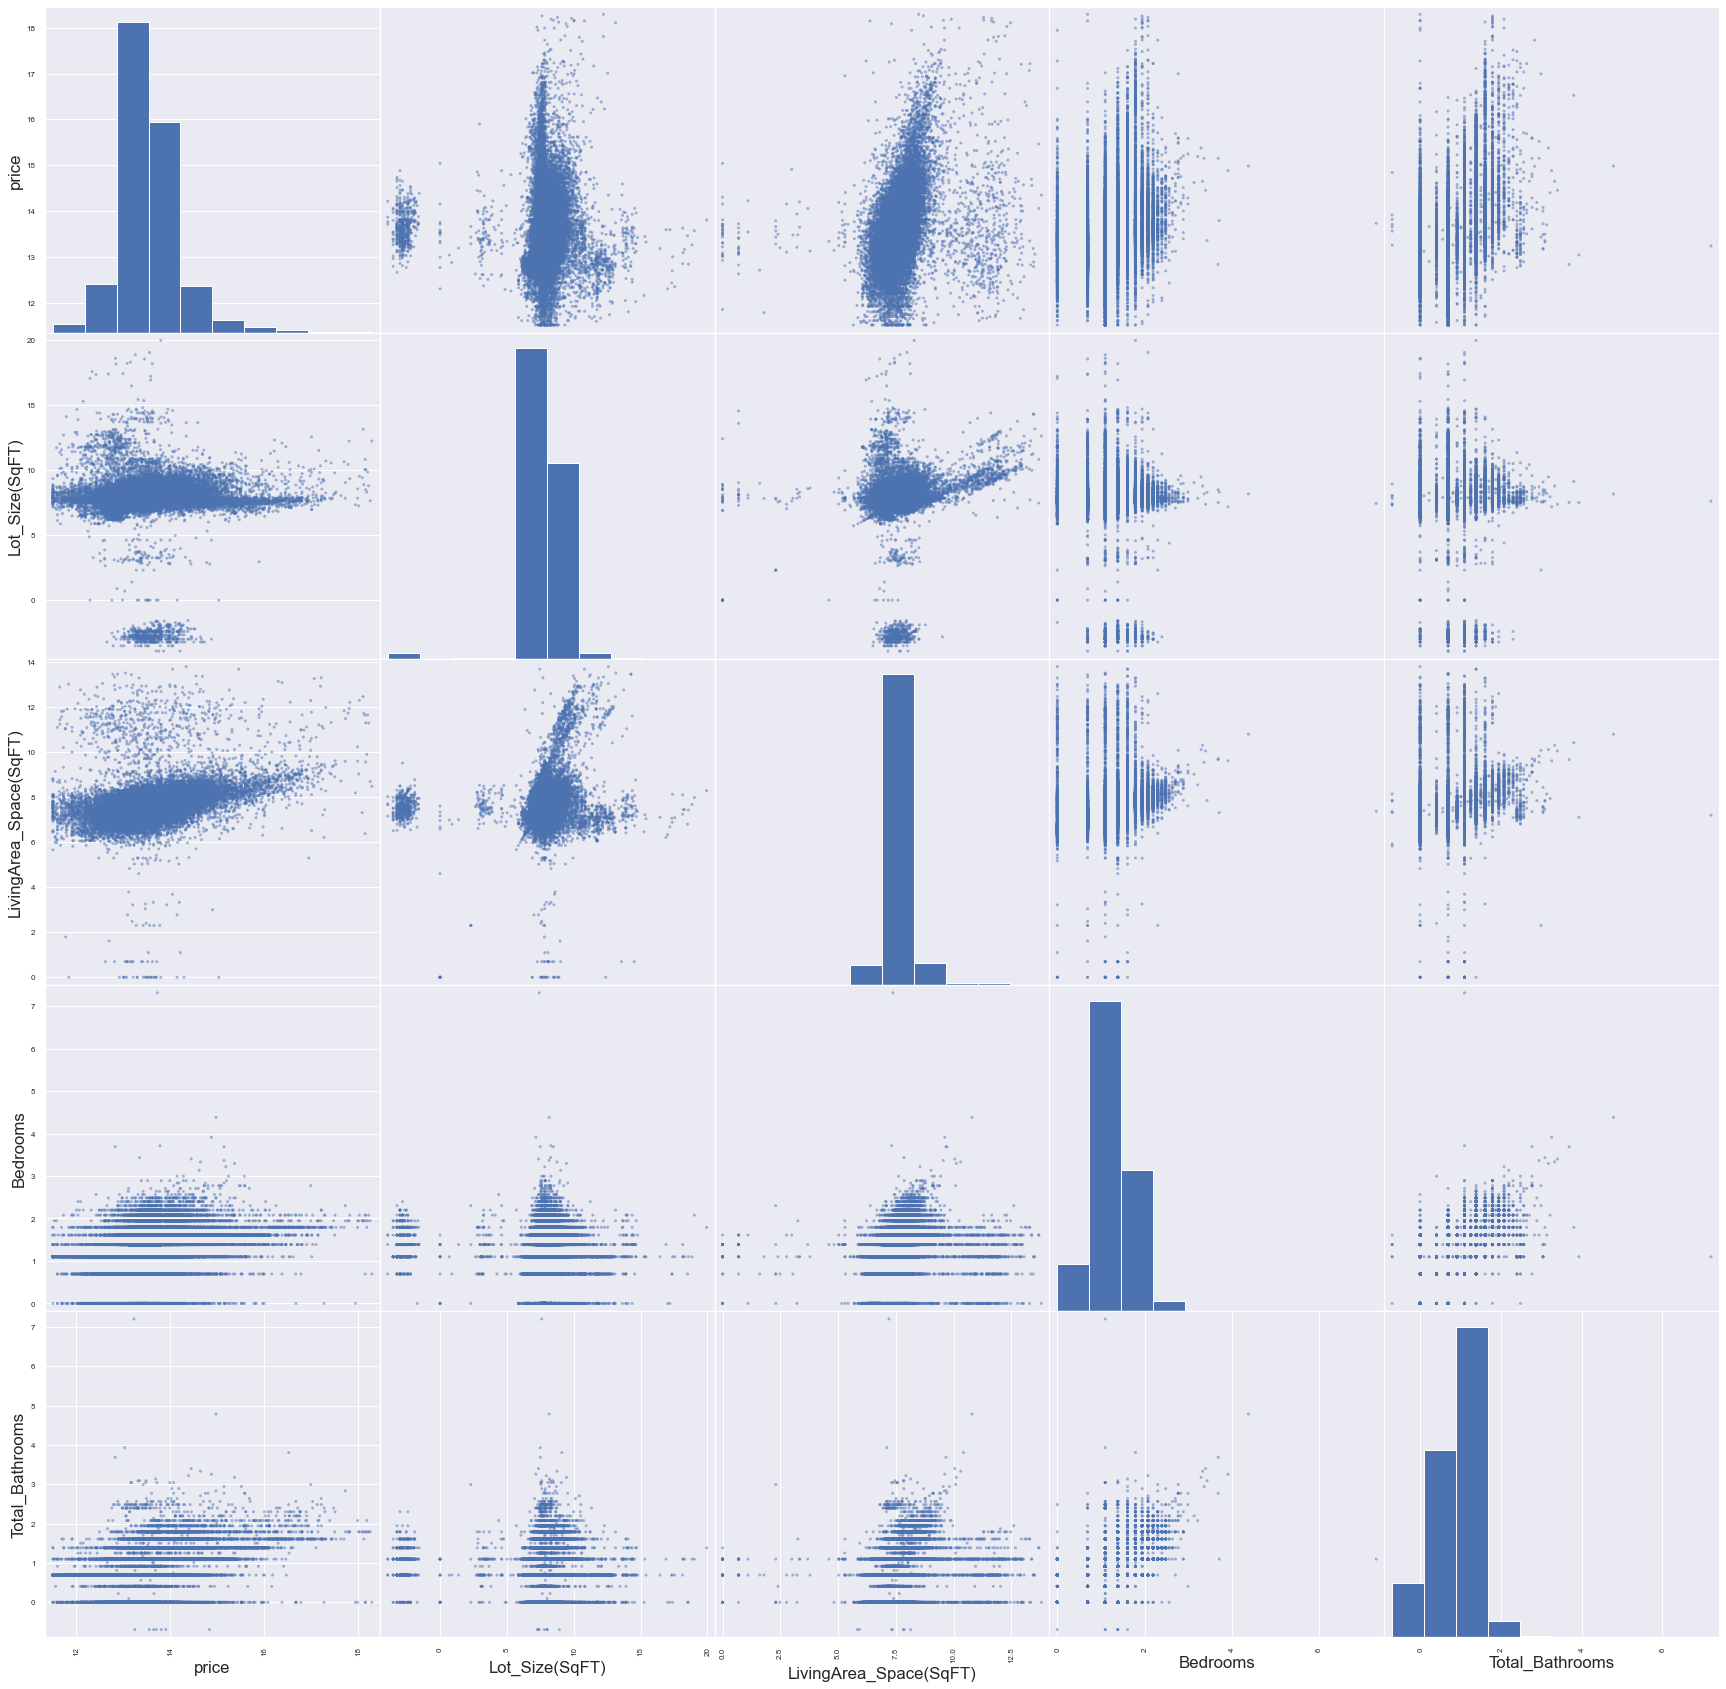

In [46]:
pd.plotting.scatter_matrix(np.log(data), figsize=(30,30))